## Read .txt file

In [2]:
import numpy as np
import re
from src.utils import modif_plot
from src.utils import quickplot

In [1]:
# read SIT observations


# CroSat AWI summaries
idir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified-sea-ice-thickness-cdr-1947-2017/'
ifile = 'ICESAT1-G_summaries_V20140418.txt'

# data from november 2010 to February 2016

In [3]:
with open(f'{idir}{ifile}','r') as f:
    lines = f.readlines()

In [4]:
header = [item for item in re.split(' +', lines[0])][1:-1] + ['SD_thkns'] 

In [5]:
header

['Source',
 'Cruise',
 'Index',
 'Year',
 'Yday',
 'MinDay',
 'MaxDay',
 'Month',
 'Lat',
 'Lon',
 'MinLat',
 'MaxLat',
 'MinLon',
 'MaxLon',
 'Length',
 'Nsamps',
 'Avg_none',
 'Min_none',
 'Max_none',
 'SD_none',
 'Avg_frbrd',
 'Min_frbrd',
 'Max_frbrd',
 'SD_frbrd',
 'Avg_thkns',
 'Min_thkns',
 'Max_thkns',
 'SD_thkns']

In [6]:
data = np.genfromtxt(f'{idir}{ifile}', delimiter='\t', dtype='U255', skip_header=1, autostrip=True)

In [7]:
data

array(['ICESAT1-G           1  11000000   2003   68.0   64.0   72.0      3   66.52 -163.74   66.28   66.77 -163.87 -163.61    103       606   -999.00   -999.00   -999.00   -999.00      0.48      0.00      3.80      0.54      2.90      0.00     33.47      4.75',
       'ICESAT1-G           1  11000001   2003   71.3   67.0   75.0      3   66.93 -167.84   66.72   67.15 -167.96 -167.73     88       518   -999.00   -999.00   -999.00   -999.00      0.33      0.00      0.90      0.14      1.44      0.00      6.25      0.88',
       'ICESAT1-G           1  11000002   2003   67.7   52.0   76.0      3   67.13 -170.46   66.87   67.37 -170.88 -169.97    223      1317   -999.00   -999.00   -999.00   -999.00      0.39      0.00      1.73      0.21      2.03      0.00     14.08      1.68',
       ...,
       'ICESAT1-G          3k  11140414   2008  288.2  284.0  292.0     10   81.83   11.15   81.52   82.04    9.79   12.53    122       721   -999.00   -999.00   -999.00   -999.00      0.27      0.00   

This type of data in the .txt file.
We get the data type from the documentation file:

In [8]:
data[0]

'ICESAT1-G           1  11000000   2003   68.0   64.0   72.0      3   66.52 -163.74   66.28   66.77 -163.87 -163.61    103       606   -999.00   -999.00   -999.00   -999.00      0.48      0.00      3.80      0.54      2.90      0.00     33.47      4.75'

In [10]:
types_data = ['U12','U12', 'int', 'int']+ ['float']*3 +['int']+ ['float']*6+ ['int', 'int']+ ['float']*12

In [11]:
# array with all the lines
arr = []
for dt in data:
    arr += [item for item in re.split(' +', dt)]

In [12]:
nlines = data.shape[0]
bb = np.array(arr).reshape(nlines,28)

In [13]:
# create dictionary from the array
dico = {}

for idx, (var, typecol) in enumerate(zip(header, types_data)):
    # format data
    if typecol == 'U12':
        typec = 'U12'
    elif typecol == 'float':
        typec = np.float64
    elif typecol == 'int':
        typec = np.int64
        
    dico[f'{var}'] = np.asarray(bb[:,idx], dtype=typec)

In [15]:
dico;

In [16]:
dico['Avg_thkns'];

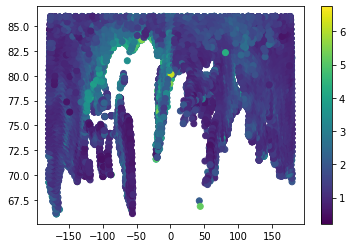

In [17]:
import matplotlib.pyplot as plt
plt.scatter(dico['Lon'], dico['Lat'], c=dico['Avg_thkns'])
plt.colorbar()

In [358]:
from importlib import reload
reload(quickplot);

In [30]:
np.unique(dico['Month'])

array([ 2,  3,  4,  5,  6, 10, 11])

In [34]:
dico['Avg_thkns'][index].shape

(2933,)

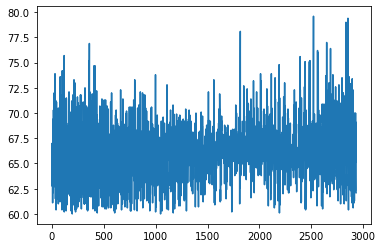

In [38]:
plt.plot(dico['Yday'][index])

In [ ]:
# save lat, lon, avg_thkns, sd_thkns

# for all points (lat,lon), identify closest point in TOPAZ
# retrieve the SIT (+uncertainty) for comparison

# if several points in the same day with the same (lat,lon) indexes in TOPAZ
# we average values

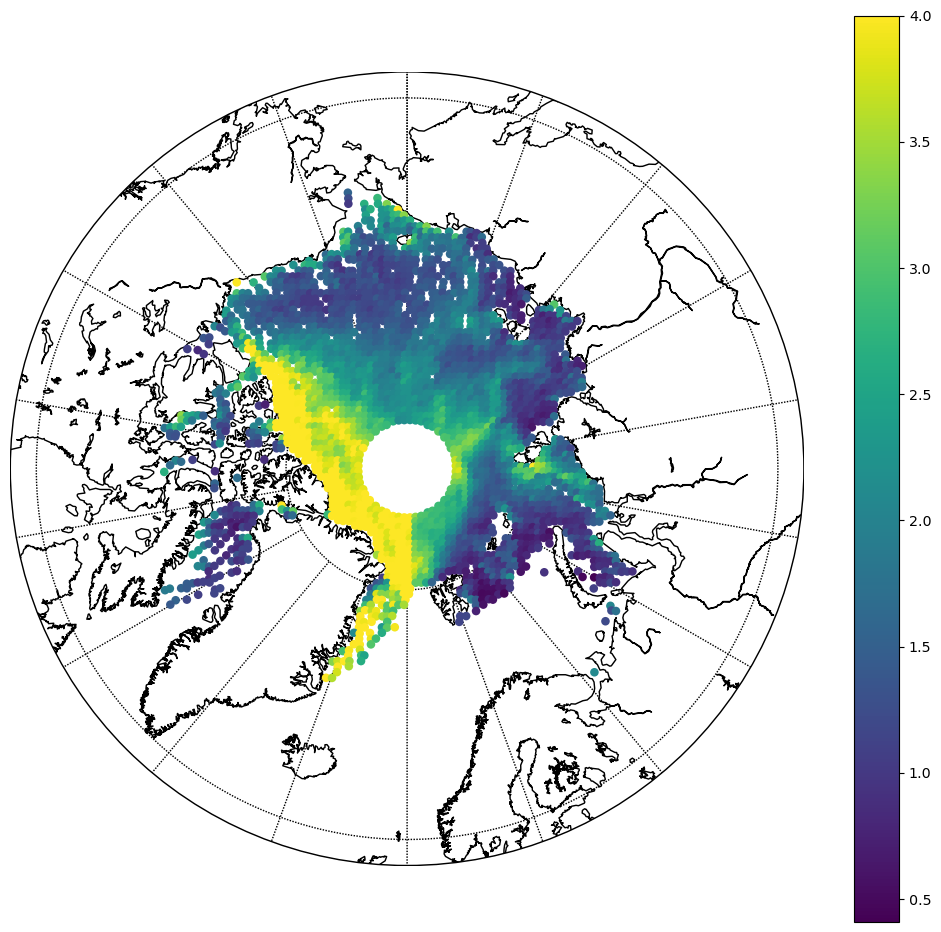

In [33]:
index = np.where((dico['Year']==2005) & (dico['Month']==3))

savefig = True
odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
filename = f'CryoSat-ICESAT-G_summaries_SIT_obs_201112.png'
ofile = f'{odir}{filename}'

quickplot.basemap(dico['Lon'][index], dico['Lat'][index], var=dico['Avg_thkns'][index], savefig=False, ofile=ofile, vmax=4, label='SIT (m)')


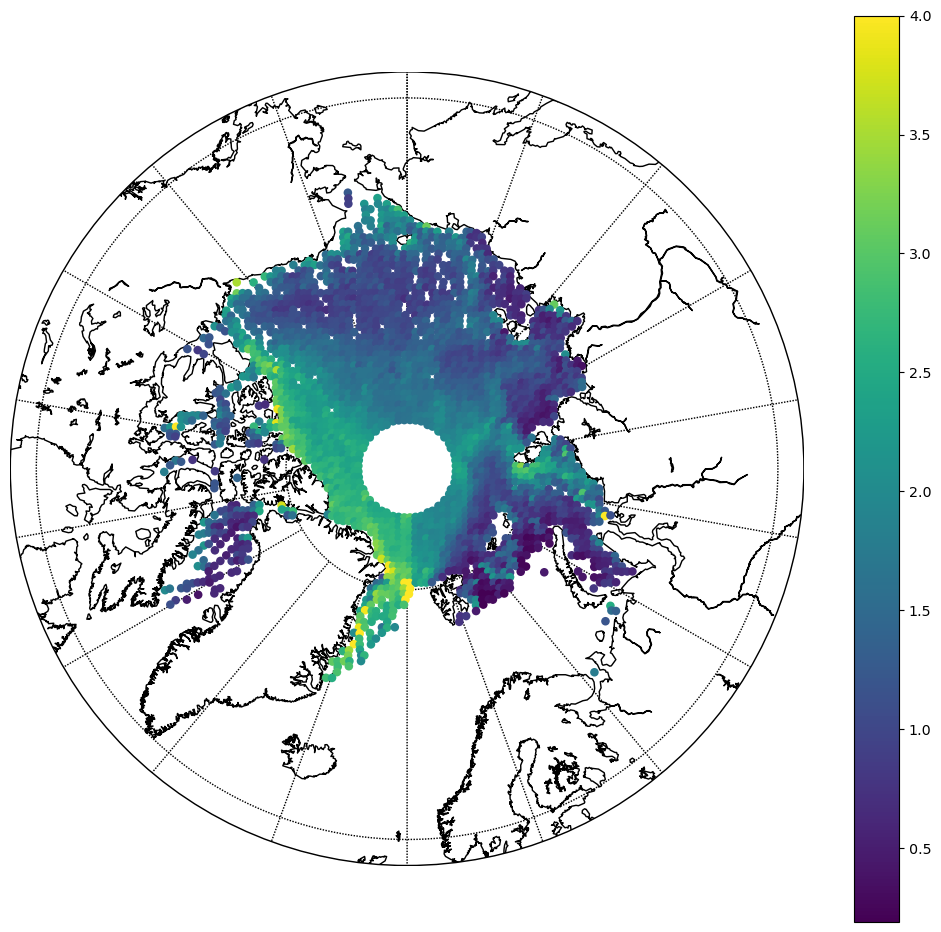

In [39]:
savefig = True
odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
filename = f'CryoSat-ICESAT-G_summaries_SIT_obs_201112.png'
ofile = f'{odir}{filename}'

quickplot.basemap(dico['Lon'][index], dico['Lat'][index], var=dico['SD_thkns'][index], savefig=False, ofile=ofile, vmax=4, label='SIT (m)')


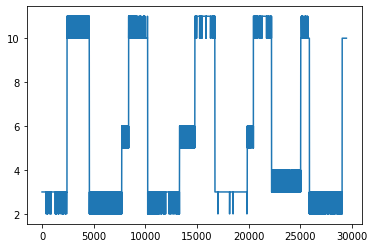

In [40]:
plt.plot(dico['Month'])

## Time whatever format to datetime

In [42]:
dico['Year']
dico['Month']
dico['Yday']

array([ 68. ,  71.3,  67.7, ..., 288.2, 287. , 287.3])

In [44]:
import datetime

In [47]:
years = dico['Year']
days = dico['Yday']

In [55]:
# dt_str = np.array([datetime.datetime.strptime(str(year)+'-'+str(int(day_num)), '%Y-%j').strftime('%Y%m%d') for year, day_num in zip(years, days)])

In [57]:
dt = np.array([datetime.date(year,1,1)+datetime.timedelta(days=int(day_num)-1) for year, day_num in zip(years, days)])

In [58]:
dt

array([datetime.date(2003, 3, 9), datetime.date(2003, 3, 12),
       datetime.date(2003, 3, 8), ..., datetime.date(2008, 10, 14),
       datetime.date(2008, 10, 13), datetime.date(2008, 10, 13)],
      dtype=object)

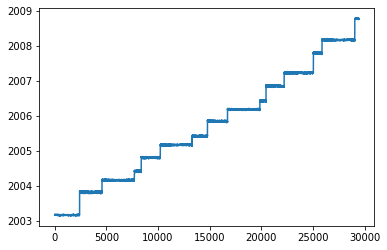

In [59]:
plt.plot(dt)

## Get monthly mean

In [63]:
# dataset average monthly from 01-2010 to 12-2016 
sitmm = np.nan * np.ones(shape=(12*7))
nind = np.nan * np.ones(shape=(12*7))
i = 0

for yr in range(2003,2009):
    for m in range(1,13):
        indexes = np.where((dico['Year']==yr) & (dico['Month']==m))
        sitmm[i] = np.nanmean(dico['Avg_thkns'][indexes])
        nind[i] = len(indexes[0])
#         if nind >0: break
        i += 1



/tmp/ipykernel_2886/3074613449.py:9: RuntimeWarning: Mean of empty slice
  sitmm[i] = np.nanmean(dico['Avg_thkns'][indexes])


In [17]:
# np.where((dico['Year']==2016) & (dico['Month']==2))

In [65]:
month_labels = ['Mar','Jun','Sept','Dec']*6 + ['Mar','Jun']
year_labels = ['2003','2004','2005','2006','2007','2008','2009']

## Save dataset in a ready to use format

In [71]:
import pickle

In [74]:
# save as .pickle
odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
ofile = f'ICESAT-G_summaries_SIT.pkl'

In [75]:
pickle.dump(dico, open(f'{odir}{ofile}','wb'))

---------------

In [ ]:
# done # save lat, lon, avg_thkns, sd_thkns

# for all points (lat,lon), identify closest point in TOPAZ
# retrieve the SIT (+uncertainty) for comparison

# if several points in the same day with the same (lat,lon) indexes in TOPAZ
# we average values

In [76]:
# load
ddic = pickle.load(open(f'{odir}{ofile}','rb'))

## Plot monthly mean

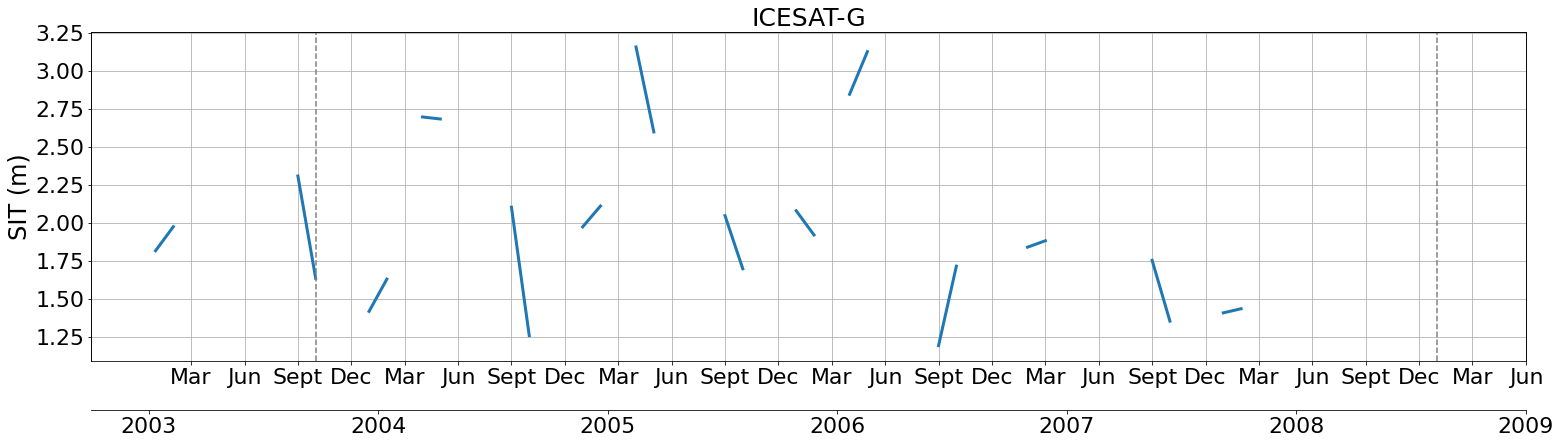

In [67]:
fig, ax = plt.subplots(figsize=(21,6))

plt.plot(sitmm, lw = 3)
plt.ylabel('SIT (m)')
plt.title('ICESAT-G')

plt.axvline(10, c='gray',ls='--')
plt.axvline(73, c='gray',ls='--')


ax.set_xticks(np.arange(3,80,3))
ax.set_xticklabels(month_labels);
ax.grid(True)

ax2 = ax.twiny()
ax2.set_xticks(np.arange(3,80,12));
ax2.set_xticklabels(year_labels);
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
#  Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))
fig.tight_layout()


modif_plot.resize(fig, 22)


if False:  # True:  # savefig:
    odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
    filename = f'CryoSat-ICESAT_summaries_SIT_monthlymean.png'
    plt.savefig(f"{odir}{filename}")
    print(f'Figure saved as: {odir}{filename}')

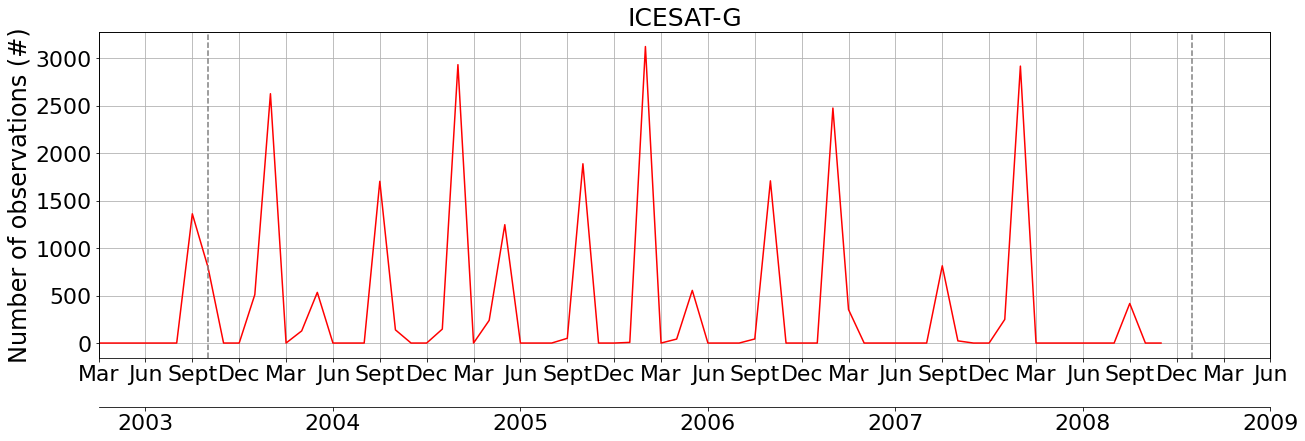

In [68]:
fig, ax = plt.subplots(figsize=(21,6))

plt.plot(nind, 'r')
plt.ylabel('Number of observations (#)')
plt.title('ICESAT-G')

plt.axvline(10, c='gray',ls='--')
plt.axvline(73, c='gray',ls='--')
plt.xlim([3,78])

ax.set_xticks(np.arange(3,80,3))
ax.set_xticklabels(month_labels);
ax.grid(True)

ax2 = ax.twiny()
ax2.set_xticks(np.arange(3,80,12));
ax2.set_xticklabels(year_labels);
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
#  Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

modif_plot.resize(fig, 22)

if False: # True:  # savefig:
    odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
    filename = f'CryoSat-AWI_summaries_SIT_monthlyObs.png'
    plt.savefig(f"{odir}{filename}")
    print(f'Figure saved as: {odir}{filename}')